In [1]:
import pandas as pd
import numpy as np


In [5]:
artwork=pd.read_csv('Artworks.csv')
# artist=pd.read_csv('Artists.csv')

In [8]:
artwork.shape
# , artwork.shape

(48541, 29)

In [61]:
artwork.head().T

,0,1,2,3,4
Title,"Ferdinandsbrücke Project, Vienna, Austria (Ele...","City of Music, National Superior Conservatory ...","Villa near Vienna Project, Outside Vienna, Aus...","The Manhattan Transcripts Project, New York, N...","Villa, project, outside Vienna, Austria, Exter..."
Artist,Otto Wagner,Christian de Portzamparc,Emil Hoppe,Bernard Tschumi,Emil Hoppe
ConstituentID,6210,7470,7605,7056,7605
ArtistBio,"(Austrian, 1841–1918)","(French, born 1944)","(Austrian, 1876–1957)","(French and Swiss, born Switzerland 1944)","(Austrian, 1876–1957)"
Nationality,(Austrian),(French),(Austrian),(),(Austrian)
BeginDate,(1841),(1944),(1876),(1944),(1876)
EndDate,(1918),(0),(1957),(0),(1957)
Gender,(Male),(Male),(Male),(Male),(Male)
Date,1896,1987,1903,1980,1903
Medium,Ink and cut-and-pasted painted pages on paper,Paint and colored pencil on print,"Graphite, pen, color pencil, ink, and gouache ...",Photographic reproduction with colored synthet...,"Graphite, color pencil, ink, and gouache on tr..."


In [67]:
artwork['year_acquired']=artwork['DateAcquired'].str[0:4]
artwork['decade_acquired']=artwork['year_acquired'].astype(float).round(-1)

In [91]:
artwork.columns.tolist()

['Title',
 'Artist',
 'ConstituentID',
 'ArtistBio',
 'Nationality',
 'BeginDate',
 'EndDate',
 'Gender',
 'Date',
 'Medium',
 'Dimensions',
 'CreditLine',
 'AccessionNumber',
 'Classification',
 'Department',
 'DateAcquired',
 'Cataloged',
 'ObjectID',
 'URL',
 'ThumbnailURL',
 'Circumference (cm)',
 'Depth (cm)',
 'Diameter (cm)',
 'Height (cm)',
 'Length (cm)',
 'Weight (kg)',
 'Width (cm)',
 'Seat Height (cm)',
 'Duration (sec.)',
 'is_photog',
 'count',
 'year_acquired',
 'decade_acquired']

In [94]:
artwork=artwork.drop(['Circumference (cm)',
                      'Depth (cm)',
                      'Diameter (cm)',
                      #  'Height (cm)',
                      'Length (cm)',
                      'Weight (kg)',
                      #  'Width (cm)',
                      'Seat Height (cm)',
                      'Duration (sec.)',

                      ], axis=1)

In [26]:
artwork['is_photog']=np.where((artwork['Medium'].str.contains("Photo")|
                               artwork['Medium'].str.contains("photo")|
                               artwork['Medium'].str.contains("foto")
                               ),
                              1,
                              0)

In [34]:
artwork['is_photog']=np.where(artwork.Classification=='Photograph',1,0)

In [35]:
artwork['is_photog'].value_counts()

0    36369
1    12172
Name: is_photog, dtype: int64

In [73]:
artwork[artwork['is_photog']==1].describe()

,ObjectID,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),is_photog,count,decade_acquired
count,12172.000000,0.0,12.000000,1.00,7375.000000,0.0,0.0,7370.000000,0.0,0.0,12172.0,12172.0,11883.000000
mean,45106.188383,NaN,7.789794,16.99,26.099552,NaN,NaN,28.312057,NaN,NaN,1.0,1.0,1972.446352
std,3643.719300,NaN,8.189290,NaN,15.512064,NaN,NaN,18.785956,NaN,NaN,0.0,0.0,13.520837
min,32009.000000,NaN,1.625000,16.99,0.000000,NaN,NaN,0.000000,NaN,NaN,1.0,1.0,1930.000000
25%,41924.750000,NaN,3.444375,16.99,17.800000,NaN,NaN,19.200000,NaN,NaN,1.0,1.0,1970.000000
50%,45082.500000,NaN,5.397505,16.99,23.500000,NaN,NaN,24.300000,NaN,NaN,1.0,1.0,1970.000000
75%,48249.250000,NaN,6.087503,16.99,31.500000,NaN,NaN,34.100000,NaN,NaN,1.0,1.0,1980.000000
max,51440.000000,NaN,26.900000,16.99,269.240500,NaN,NaN,609.600000,NaN,NaN,1.0,1.0,2000.000000


In [102]:
artwork['born'] = artwork['BeginDate'].str.replace('(', '', regex=True)
artwork['born'] = artwork['born'].str.replace(')', '', regex=True)

artwork['dead'] = artwork['EndDate'].str.replace('(', '', regex=True)
artwork['dead'] = artwork['dead'].str.replace(')', '', regex=True)

# artwork['artist_age_when_work_made']=artwork['Date'].str[0:4].astype(float)-artwork['born'].astype(float)
# artwork['artist_age_when_work_acquired']=artwork['Date'].astype(float)-artwork['year_acquired'].astype(float)
# artist['artist_is_alive_when_work_acquired']=np.where((artwork['year_acquired'].astype(float)>artwork['dead'].astype(float)|
                                                      #  artwork['EndDate']=='(0)')
                                                      #   ,1,0)

In [75]:
artwork[artwork['is_photog']==1].Medium.value_counts().reset_index().to_csv('20231118_photography_medium.csv')

In [36]:
artwork[artwork['is_photog']==1].Medium.value_counts().reset_index()
artwork['count']=1

In [31]:
artwork[artwork['is_photog']==1].Medium.nunique()

518

In [33]:
artwork.Classification.value_counts()

Illustrated Book             22816
Photograph                   12172
Design                        6982
Drawing                       4863
Architecture                   886
Print                          491
Periodical                     233
Mies van der Rohe Archive       81
Painting                         6
Multiple                         5
Fashion                          1
Film                             1
Installation                     1
Film (object)                    1
Ephemera                         1
Name: Classification, dtype: int64

<Axes: xlabel='decade_acquired'>

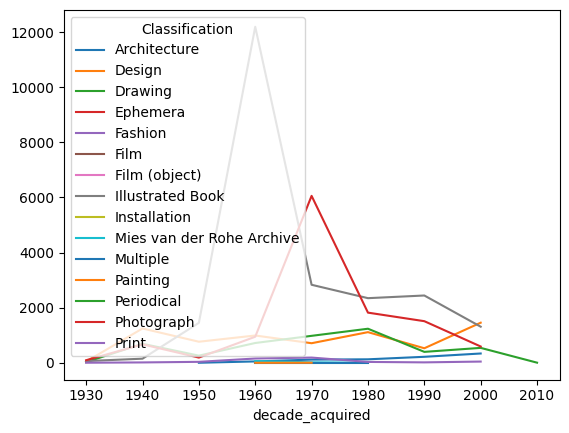

In [85]:
temp=artwork.groupby(['Classification','decade_acquired'])['count'].sum().reset_index()
temp=temp.pivot(columns='Classification',index='decade_acquired',values='count')
temp.head()
temp.plot()

<ipython-input-39-0c4a9dccb562>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp=artwork.groupby('DateAcquired')['count','is_photog'].sum()


<Axes: xlabel='DateAcquired'>

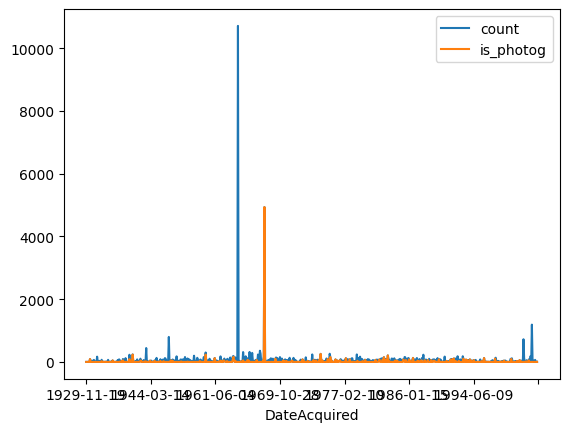

In [39]:
temp=artwork.groupby('DateAcquired')['count','is_photog'].sum()
temp.plot()

<ipython-input-49-8560282db4b1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp=artwork.groupby('year_acquired')['count','is_photog'].sum()


<Axes: xlabel='year_acquired'>

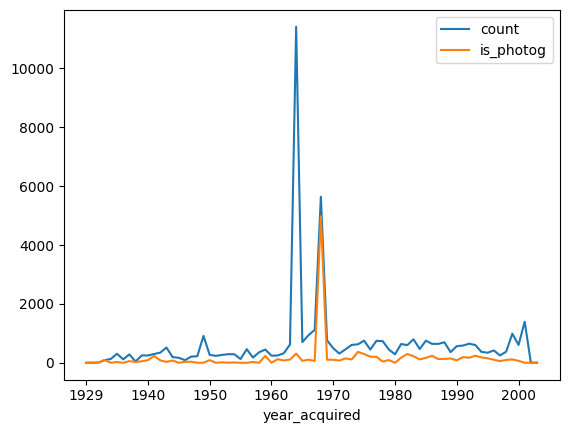

In [49]:
temp=artwork.groupby('year_acquired')['count','is_photog'].sum()
temp.plot()

<ipython-input-52-1f7ec31fcefb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp=artwork.groupby('year_acquired')['count','is_photog'].sum()


<Axes: xlabel='year_acquired'>

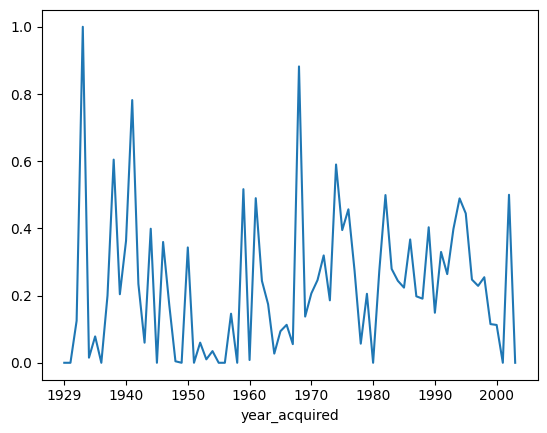

In [52]:
temp=artwork.groupby('year_acquired')['count','is_photog'].sum()
temp['percent_acquired_photog']=temp['is_photog']/temp['count']
temp['percent_acquired_photog'].plot()

<ipython-input-72-239e576b6cee>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp=artwork.groupby('decade_acquired')['count','is_photog'].sum()


<Axes: xlabel='decade_acquired'>

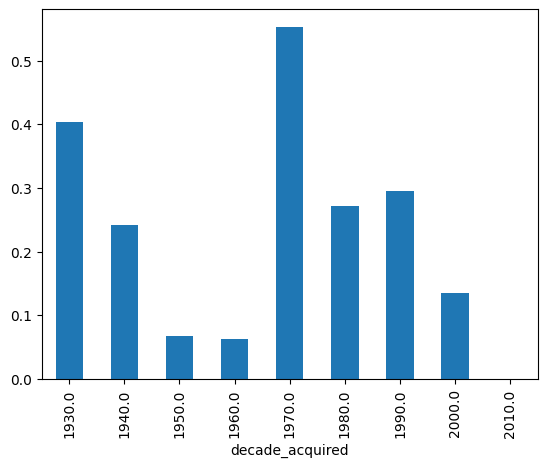

In [72]:
temp=artwork.groupby('decade_acquired')['count','is_photog'].sum()
temp['percent_acquired_photog']=temp['is_photog']/temp['count']
temp['percent_acquired_photog'].plot(kind='bar')


In [93]:
artwork[artwork['is_photog']==1].sort_values(by='DateAcquired').head().T

,41796,43146,41672,43581,42601
Title,"New York City, Old and New","Greek Houses, Somerville, Massachusetts","Mansard House, South Boston, Massachusetts","Greek Building, East Boston, Massachusetts","Pickering House, Gothic Style, Salem, Massachu..."
Artist,Clara E. Sipprell,Walker Evans,Walker Evans,Walker Evans,Walker Evans
ConstituentID,5453,1777,1777,1777,1777
ArtistBio,"(American, born Canada. 1885–1975)","(American, 1903–1975)","(American, 1903–1975)","(American, 1903–1975)","(American, 1903–1975)"
Nationality,(American),(American),(American),(American),(American)
BeginDate,(1885),(1903),(1903),(1903),(1903)
EndDate,(1975),(1975),(1975),(1975),(1975)
Gender,(Female),(Male),(Male),(Male),(Male)
Date,c. 1920,1932,1932,1932,1932
Medium,Gelatin silver print,Gelatin silver print,Gelatin silver print,Gelatin silver print,Gelatin silver print


In [95]:
artwork[artwork['is_photog']==1].sort_values(by='DateAcquired',ascending=False).head(3).T

,45480,47558,48496
Title,"Ancient Volcanic Vent at Bifrust, Iceland",New York City,Texas
Artist,Stuart Klipper,Lee Friedlander,Lee Friedlander
ConstituentID,3150,2002,2002
ArtistBio,"(American, born 1941)","(American, born 1934)","(American, born 1934)"
Nationality,(American),(American),(American)
BeginDate,(1941),(1934),(1934)
EndDate,(0),(0),(0)
Gender,(Male),(Male),(Male)
Date,1976,1962,1965
Medium,"Gelatin silver print, printed 1993",Gelatin silver print,Gelatin silver print


In [173]:
artwork[artwork['is_photog']==1].sort_values(by='DateAcquired',ascending=False).head(3).T

,45480,47558,48496
Title,"Ancient Volcanic Vent at Bifrust, Iceland",New York City,Texas
Artist,Stuart Klipper,Lee Friedlander,Lee Friedlander
ConstituentID,3150,2002,2002
ArtistBio,"(American, born 1941)","(American, born 1934)","(American, born 1934)"
Nationality,(American),(American),(American)
BeginDate,(1941),(1934),(1934)
EndDate,(0),(0),(0)
Gender,(Male),(Male),(Male)
Date,1976,1962,1965
Medium,"Gelatin silver print, printed 1993",Gelatin silver print,Gelatin silver print


In [174]:
artist_country= artwork.groupby(['Artist','Nat_clean','gender_group'])['count'].sum().reset_index()
artist_country.head()

,Artist,Nat_clean,gender_group,count
0,A. Alcorn,American,Other,1
1,A. Andreas,French,Other,1
2,A. E. Gallatin,American,Male,1
3,A. F. Gangkofner,German,Other,2
4,A. F. Sherman,American,Male,1


In [184]:
import datetime as dt

artwork['DateAcquired']=pd.to_datetime(artwork['DateAcquired'])

In [185]:
print(artwork[artwork['is_photog']].DateAcquired.min(),
      artwork[artwork['is_photog']].DateAcquired.max())

KeyError: ignored

In [176]:
photographer=artwork[artwork['is_photog']==1].Artist.value_counts().reset_index()
photographer['percent']=photographer['Artist']/photographer['Artist'].sum()
photographer=photographer.rename(columns={ 'Artist': "acquired_work_count", 'index': "Artist"})
photographer=photographer.merge(artist_country[['Artist','Nat_clean','gender_group']],how='left', on='Artist')

photographer.head(30)

,Artist,acquired_work_count,percent,Nat_clean,gender_group
0,Eugène Atget,4990,0.409957,French,Male
1,Edward Steichen,235,0.019307,American,Male
2,Unidentified photographer,228,0.018732,n/a,Other
3,Eadweard J. Muybridge,203,0.016678,American,Male
4,Alfred Capel Cure,180,0.014788,British,Male
5,Lee Friedlander,179,0.014706,American,Male
6,William Eggleston,172,0.014131,American,Male
7,Walker Evans,168,0.013802,American,Male
8,Ansel Adams,140,0.011502,American,Male
9,Francis Frith,125,0.010269,British,Male


In [218]:
photographer.to_csv('20231118_photographer_summary.csv',index=False)

In [106]:
"artwork[artwork['is_photog']==1].Artist.nunique()

1043

In [107]:
artwork[artwork['is_photog']==1].Gender.value_counts().head(30)

(Male)                  11004
(Female)                  741
()                        288
(Male) (Male)              64
(Male) (Female)            27
(Male) ()                  26
(Male) () ()               11
(Female) (Male)             4
(Female) (Female)           4
(Male) (Male) (Male)        2
() ()                       1
Name: Gender, dtype: int64

In [111]:
artwork[artwork['is_photog']==1].groupby('Gender')['Artist'].nunique().reset_index().sort_values(by='Artist',ascending=False)

,Gender,Artist
5,(Male),827
2,(Female),152
0,(),35
9,(Male) (Male),14
8,(Male) (Female),4
4,(Female) (Male),3
6,(Male) (),3
10,(Male) (Male) (Male),2
1,() (),1
3,(Female) (Female),1


In [123]:
artwork['gender_group']=np.where(artwork['Gender']== '(Male) (Male)','(Male)',artwork['Gender'])
artwork['gender_group']=np.where(artwork['gender_group']=='(Male) ()','(Male)',artwork['gender_group'])
artwork['gender_group']=np.where(artwork['gender_group']=='(Male) (Male) (Male)','(Male)',artwork['gender_group'])
artwork['gender_group']=np.where(artwork['gender_group']=='(Male) () ()','(Male)',artwork['gender_group'])

artwork['gender_group']=np.where(artwork['gender_group']=='(Female) (Female)','(Female)',artwork['gender_group'])

artwork['gender_group']=np.where((artwork['gender_group']=='(Male)')|((artwork['gender_group']=='(Female)')),
                                  artwork['gender_group'], '(Other)')





In [125]:
artwork['gender_group'] = artwork['gender_group'].str.replace('(', '', regex=True)
artwork['gender_group'] = artwork['gender_group'].str.replace(')', '', regex=True)
artwork[artwork['is_photog']==1].groupby('gender_group')['Artist'].nunique().reset_index().sort_values(by='Artist',ascending=False)

,gender_group,Artist
1,Male,847
0,Female,153
2,Other,43


In [129]:
artwork.Nationality.value_counts().reset_index().head(40)

,index,Nationality
0,(French),16666
1,(American),14495
2,(British),2454
3,(German),2372
4,(Spanish),1860
5,(Italian),1140
6,(Russian),1010
7,(Swiss),800
8,(),766
9,(Nationality unknown),750


In [130]:
artwork[artwork['is_photog']==1].Nationality.value_counts().reset_index().head(40)

,index,Nationality
0,(French),5435
1,(American),5081
2,(British),551
3,(),239
4,(Japanese),192
5,(German),159
6,(Russian),75
7,(Italian),54
8,(Czech),43
9,(Mexican),31


In [143]:
artwork['Nat_clean'] = artwork['Nationality'].str.replace('()', '', regex=True)
artwork['Nat_clean'] = artwork['Nat_clean'].str.split(')').str[0]
artwork['Nat_clean'] = artwork['Nat_clean'].str.replace('(', '', regex=True)
artwork['Nat_clean'] = np.where(artwork['Nat_clean'] == '','n/a',artwork['Nat_clean'] )

In [144]:
artwork[artwork['is_photog']==1].Nat_clean.value_counts().reset_index().head(20)

,index,Nat_clean
0,French,5461
1,American,5117
2,British,557
3,n/a,240
4,Japanese,192
5,German,167
6,Russian,75
7,Austrian,67
8,Italian,54
9,Czech,43


In [145]:
artwork.Nat_clean.value_counts().reset_index().head(20)

,index,Nat_clean
0,French,16758
1,American,14936
2,British,2507
3,German,2452
4,Spanish,1870
5,Italian,1233
6,Russian,1135
7,n/a,863
8,Swiss,828
9,Nationality unknown,753


In [154]:
country_df=artwork.groupby('Nat_clean')[['count','is_photog']].sum().reset_index()
country_df['country_work_rank']=country_df['count'].rank(ascending=False)
country_df['country_photog_work_rank']=country_df['is_photog'].rank(ascending=False)
country_df.sort_values(by='count',ascending=False).head(30)
country_df.sort_values(by='is_photog',ascending=False).head(30)

,Nat_clean,count,is_photog,country_work_rank,country_photog_work_rank
25,French,16758,5461,1.0,1.0
1,American,14936,5117,2.0,2.0
8,British,2507,557,3.0,3.0
70,n/a,863,240,8.0,4.0
38,Japanese,686,192,11.0,5.0
27,German,2452,167,4.0,6.0
55,Russian,1135,75,7.0,7.0
4,Austrian,381,67,15.0,8.0
37,Italian,1233,54,6.0,9.0
18,Czech,404,43,14.0,10.0


In [155]:
country_df.to_csv('20231118_nationality_summary.csv',index=False)

<Axes: xlabel='Width (cm)', ylabel='Height (cm)'>

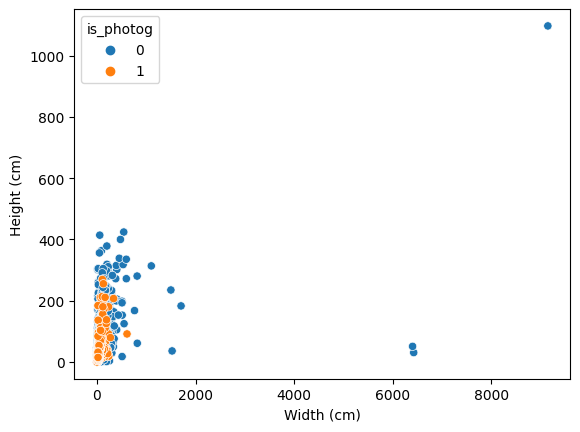

In [187]:
import seaborn as sns


sns.scatterplot(data=artwork,
                x="Width (cm)",
                y="Height (cm)",
                hue='is_photog')

<Axes: xlabel='Width (cm)', ylabel='Height (cm)'>

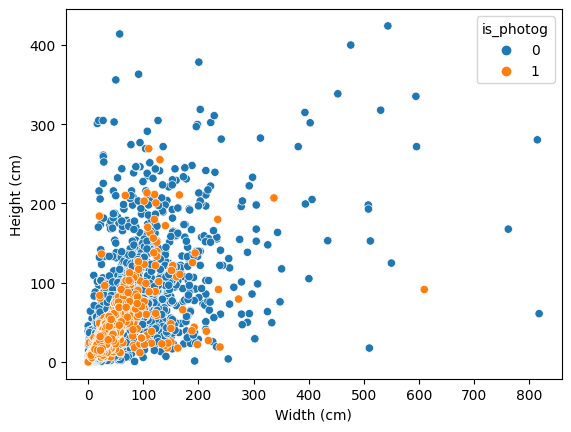

In [194]:
import seaborn as sns


sns.scatterplot(data=artwork[artwork['Width (cm)']<=1000],
                x="Width (cm)",
                y="Height (cm)",
                hue='is_photog')

<Axes: xlabel='Width (cm)', ylabel='Height (cm)'>

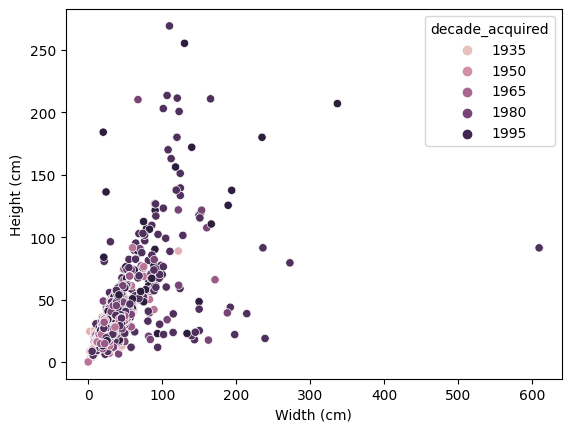

In [196]:
sns.scatterplot(data=artwork[(artwork['is_photog']==1)],
                x="Width (cm)",
                y="Height (cm)",
                hue='decade_acquired')

<Axes: xlabel='Width (cm)', ylabel='Height (cm)'>

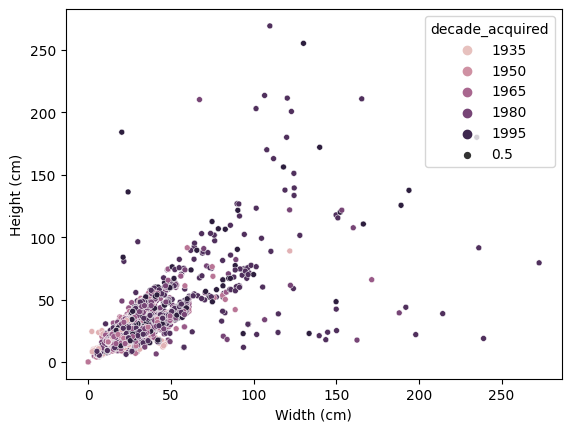

In [200]:
sns.scatterplot(data=artwork[(artwork['is_photog']==1)&(artwork['Width (cm)']<=300)],
    # data=artwork[artwork['Width (cm)']<=1000],
                x="Width (cm)",
                y="Height (cm)",
                size = 0.5,
                hue='decade_acquired')

In [208]:
artwork['orientation']=np.where(artwork['Height (cm)']== artwork['Width (cm)'],'square',
                       np.where(artwork['Height (cm)']> artwork['Width (cm)'],'portrait',
                       np.where(artwork['Height (cm)']< artwork['Width (cm)'],'landscape',
                       'n/a')))

In [207]:
artwork[artwork['orientation']=='other'].head().T

,77,176,185,239,251
Title,Misc. objects,"Nara Convention Hall, Nara, Japan, Exterior pe...",American System-Built Houses for The Richards ...,"Sixth Street House project, Santa Monica, Cali...","Floating Compression Column,"
Artist,Ludwig Mies van der Rohe,Arata Isozaki,Frank Lloyd Wright,"Thom Mayne, Andrew Zago",Kenneth Snelson
ConstituentID,7166,2837,6459,"8218, 22884",5498
ArtistBio,"(American, born Germany. 1886–1969)","(Japanese, born 1931)","(American, 1867–1959)","(American, born 1944) (American, born 1958)","(American, 1927–2016)"
Nationality,(American),(Japanese),(American),(American) (American),(American)
BeginDate,(1886),(1931),(1867),(1944) (1958),(1927)
EndDate,(1969),(0),(1959),(0) (0),(2016)
Gender,(Male),(Male),(Male),(Male) (Male),(Male)
Date,n.d.,1992,1915-17,.1-3 1987; .4 1990,1959
Medium,NaN,Synthetic polymer paint on computer-generated ...,Lithograph,Serigraph with metal foil on paper,Aluminum and stainless steel


In [209]:
orientation=artwork.groupby(['is_photog','orientation'])['count'].count().reset_index()
orientation=orientation.pivot(index='orientation',columns='is_photog',values='count')
orientation

is_photog,0,1
orientation,,
landscape,11308,4037
n/a,2841,4803
portrait,21640,3129
square,580,203


In [210]:
artwork['has_thumbnail_url']=np.where(artwork['ThumbnailURL'].notnull(),1,0)
artwork[artwork['is_photog']==1].has_thumbnail_url.value_counts()

1    7812
0    4360
Name: has_thumbnail_url, dtype: int64

<ipython-input-215-9111aceeb2ff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp=artwork[artwork['is_photog']==1].groupby('year_acquired')['count','has_thumbnail_url'].sum()


<Axes: xlabel='year_acquired'>

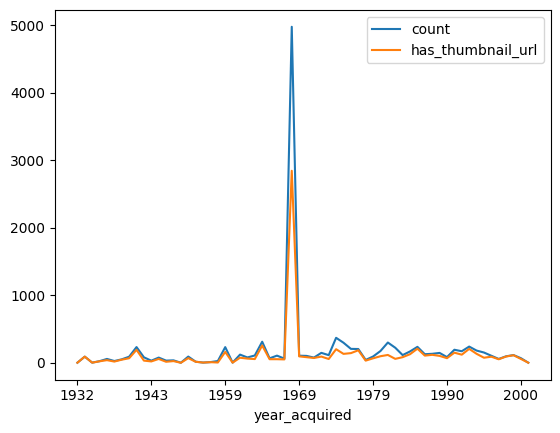

In [215]:
temp=artwork[artwork['is_photog']==1].groupby('year_acquired')['count','has_thumbnail_url'].sum()
temp.plot()

<ipython-input-217-726b572080b8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp=artwork[artwork['is_photog']==1].groupby('DateAcquired')['count','has_thumbnail_url'].sum()


<Axes: xlabel='DateAcquired'>

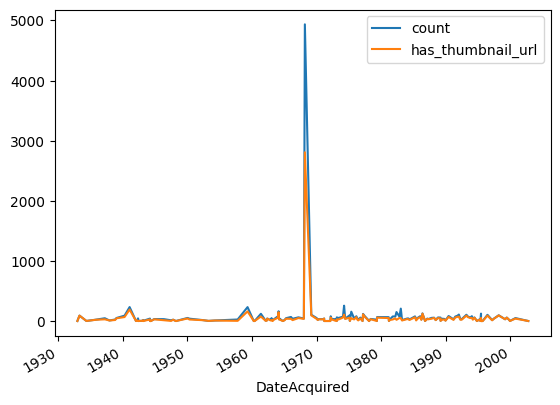

In [217]:
temp=artwork[artwork['is_photog']==1].groupby('DateAcquired')['count','has_thumbnail_url'].sum()
temp.plot()

<ipython-input-214-7303121c0d79>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp=artwork.groupby('year_acquired')['count','has_thumbnail_url'].sum()


<Axes: xlabel='year_acquired'>

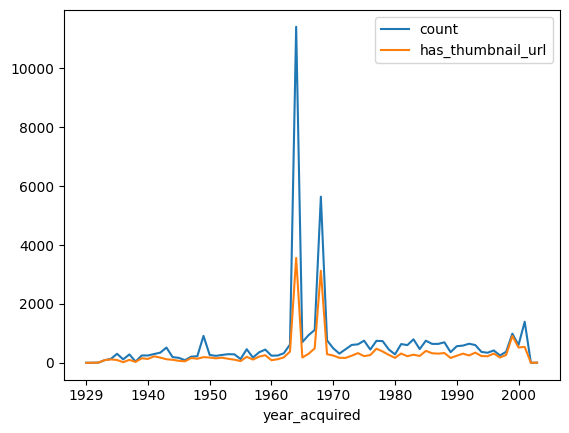

In [214]:
temp=artwork.groupby('year_acquired')['count','has_thumbnail_url'].sum()
temp.plot()

In [213]:
7812/(7812+4360)

0.6418008544199802

In [211]:
artwork[artwork['is_photog']!=1].has_thumbnail_url.value_counts()

0    21712
1    14657
Name: has_thumbnail_url, dtype: int64

In [212]:
14657/(14657+21712)

0.403008056311694